Name: Arijit Roy Chowdhury

Email: rc.arijit@gmail.com

Role: Data Scientist

Prepare a model for the HR department to predict the Attrition and give the insights from the data
about the important factors associated with the attrition so that HR can take the corrective or
preventive measures to stop or control the attrition.

# Import Libraries

In [1]:
import time
import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler   # same as preprocessing.scale(data)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from urllib.request import urlopen 
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

# Read the CSV File and check it's attributes

In [2]:
# Read the CSV File. File path to be modified if executed on a different Machine / OS

df = pd.read_csv('HR_Employee_Attrition_Data.csv')
dx = ['No', 'Yes']
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# Check the column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.shape
# Insights: The dataset has 2940 rows and 35 columns

(2940, 35)

In [5]:
df.dtypes
# Insights: There are 9 object type variable columns that we will either drop or convert to numeric later

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Check for Missing Data

total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# Insight: There is no missing data in any of the columns

,Total,Percent
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


# Attrition based on Gender

In [7]:
# Categories available in Gender
df["Gender"].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

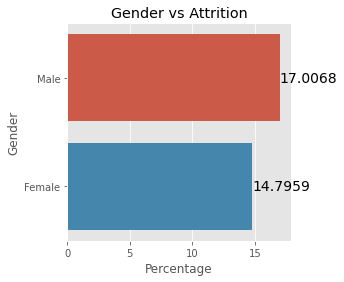

In [8]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
m = df[(df["Gender"]=="Male") & (df["Attrition"]=="Yes")].value_counts('Gender')[0] / df[(df["Gender"]=="Male")].value_counts('Gender')[0]
f = df[(df["Gender"]=="Female") & (df["Attrition"]=="Yes")].value_counts('Gender')[0] / df[(df["Gender"]=="Female")].value_counts('Gender')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
gender_attrition_count = pd.DataFrame(data = [[m*100, f*100]], columns = ['Male', 'Female'])

# Plot Ratio of Male:Female in Attrition
f, ax = plt.subplots(figsize=(4,4))
sns.barplot(ax = ax, data = gender_attrition_count, orient = 'h')
ax.set_title("Gender vs Attrition")
plt.ylabel("Gender")
plt.xlabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: There are more males than females in the dataset
# Males are slightly more likely to quit (17%) than Females (14.8%)

# Attrition based on Marital Status

In [9]:
# Categories available in MaritalStatus
df["MaritalStatus"].value_counts()

Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64

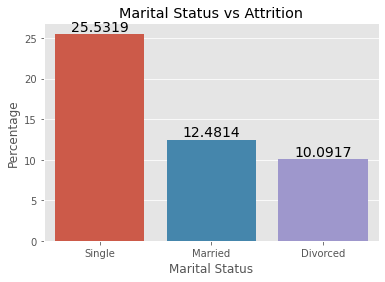

In [10]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
si = df[(df["MaritalStatus"]=="Single")   & (df["Attrition"]=="Yes")].value_counts('MaritalStatus')[0] / df[(df["MaritalStatus"]=="Single")].value_counts('MaritalStatus')[0]
mr = df[(df["MaritalStatus"]=="Married")  & (df["Attrition"]=="Yes")].value_counts('MaritalStatus')[0] / df[(df["MaritalStatus"]=="Married")].value_counts('MaritalStatus')[0]
di = df[(df["MaritalStatus"]=="Divorced") & (df["Attrition"]=="Yes")].value_counts('MaritalStatus')[0] / df[(df["MaritalStatus"]=="Divorced")].value_counts('MaritalStatus')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
ms_attrition_count = pd.DataFrame(data = [[si*100, mr*100, di*100]], columns = ['Single', 'Married', 'Divorced'])

# Marital Status vs Attrition Plot
f, ax = plt.subplots(figsize=(6,4))
sns.barplot(ax = ax, data = ms_attrition_count)
ax.set_title("Marital Status vs Attrition")
plt.xlabel("Marital Status")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Attrition is high for Single Employees (25.5%) compared to Married (12.5%) and Divorced (10%)

# Attrition Based on Overtime

In [11]:
# Categories available in OverTime
df["OverTime"].value_counts()

No     2108
Yes     832
Name: OverTime, dtype: int64

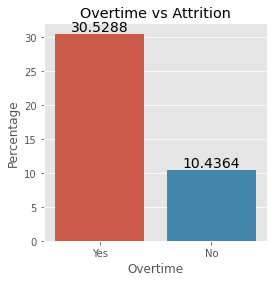

In [12]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
ot   = df[(df["OverTime"]=="Yes") & (df["Attrition"]=="Yes")].value_counts('OverTime')[0] / df[(df["OverTime"]=="Yes")].value_counts('OverTime')[0]
n_ot = df[(df["OverTime"]=="No")  & (df["Attrition"]=="Yes")].value_counts('OverTime')[0] / df[(df["OverTime"]== "No")].value_counts('OverTime')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
ot_attrition_count = pd.DataFrame(data = [[ot*100, n_ot*100]], columns = ['Yes', 'No'])

# Overtime vs Attrition Plot
f, ax = plt.subplots(figsize=(4,4))
sns.barplot(ax = ax, data = ot_attrition_count)
ax.set_title("Overtime vs Attrition")
plt.xlabel("Overtime")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Employees working overtime has a much higher Attrition (30%) than employees not working overtime (10%)

# Attrition based on Business Travel

In [13]:
# Categories available in BusinessTravel
df["BusinessTravel"].value_counts()

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

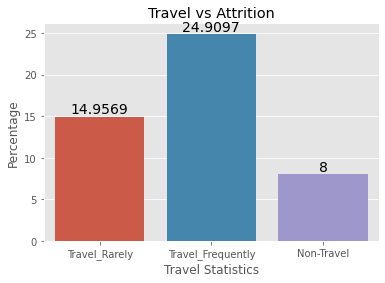

In [14]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
tr = df[(df["BusinessTravel"]=="Travel_Rarely")     & (df["Attrition"]=="Yes")].value_counts('BusinessTravel')[0] / df[(df["BusinessTravel"]=="Travel_Rarely")].value_counts('BusinessTravel')[0]
tf = df[(df["BusinessTravel"]=="Travel_Frequently") & (df["Attrition"]=="Yes")].value_counts('BusinessTravel')[0] / df[(df["BusinessTravel"]=="Travel_Frequently")].value_counts('BusinessTravel')[0]
nt = df[(df["BusinessTravel"]=="Non-Travel")        & (df["Attrition"]=="Yes")].value_counts('BusinessTravel')[0] / df[(df["BusinessTravel"]=="Non-Travel")].value_counts('BusinessTravel')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
travel_attrition_count = pd.DataFrame(data = [[tr*100, tf*100, nt*100]], 
                                      columns = ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'])

# Attrition plot based on Business Travel
f, ax = plt.subplots(figsize=(6,4))
sns.barplot(ax = ax, data = travel_attrition_count)
ax.set_title("Travel vs Attrition")
plt.xlabel("Travel Statistics")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Attrition is highest among employees who travel frequently (25%), folowed by those who travel rarely (15%)

# Attrition based on Department

In [15]:
# Categories available in Department
df["Department"].value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

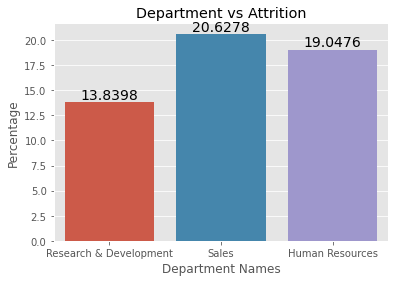

In [16]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
rnd = df[(df["Department"]=="Research & Development") & (df["Attrition"]=="Yes")].value_counts('Department')[0] / df[(df["Department"]=="Research & Development")].value_counts('Department')[0]
sal = df[(df["Department"]=="Sales") & (df["Attrition"]=="Yes")].value_counts('Department')[0] / df[(df["Department"]=="Sales")].value_counts('Department')[0]
hr  = df[(df["Department"]=="Human Resources") & (df["Attrition"]=="Yes")].value_counts('Department')[0] / df[(df["Department"]=="Human Resources")].value_counts('Department')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
dept_attrition_count = pd.DataFrame(data = [[rnd*100, sal*100, hr*100]], 
                                    columns = ['Research & Development', 'Sales', 'Human Resources'])

# Attrition plot based on Department
f, ax = plt.subplots(figsize=(6,4))
sns.barplot(ax = ax, data = dept_attrition_count)
ax.set_title("Department vs Attrition")
plt.xlabel("Department Names")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Attrition is highest in Sales (20.6%), followed by Human Resources (19%)

# Attrition based on Job Role

In [17]:
# Categories available in Job Role
df["JobRole"].value_counts()

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

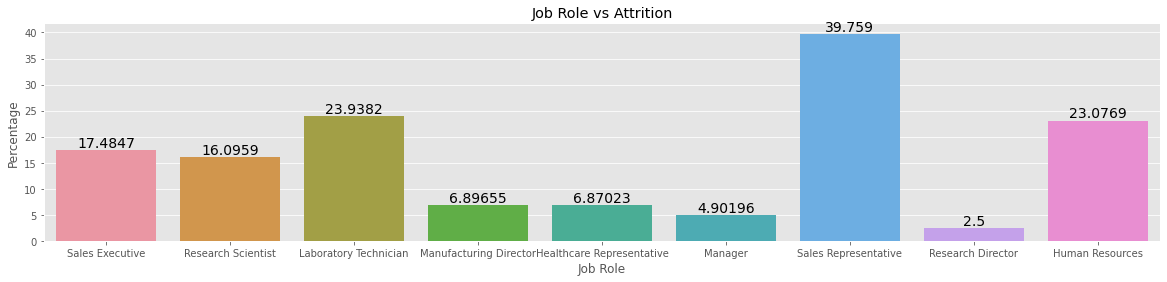

In [18]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
se = df[(df["JobRole"]=="Sales Executive") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Sales Executive")].value_counts('JobRole')[0]
rs = df[(df["JobRole"]=="Research Scientist") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Research Scientist")].value_counts('JobRole')[0]
lt = df[(df["JobRole"]=="Laboratory Technician") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Laboratory Technician")].value_counts('JobRole')[0]
md = df[(df["JobRole"]=="Manufacturing Director") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Manufacturing Director")].value_counts('JobRole')[0]
hcr= df[(df["JobRole"]=="Healthcare Representative") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Healthcare Representative")].value_counts('JobRole')[0]
mgr= df[(df["JobRole"]=="Manager") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Manager")].value_counts('JobRole')[0]
sr = df[(df["JobRole"]=="Sales Representative") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Sales Representative")].value_counts('JobRole')[0]
rd = df[(df["JobRole"]=="Research Director") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Research Director")].value_counts('JobRole')[0]
hr = df[(df["JobRole"]=="Human Resources") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Human Resources")].value_counts('JobRole')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
job_role_count = pd.DataFrame(data = [[se*100, rs*100, lt*100, md*100, hcr*100, mgr*100, sr*100, rd*100, hr*100]], 
                              columns = ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 
                                         'Manufacturing Director', 'Healthcare Representative', 'Manager',
                                         'Sales Representative', 'Research Director', 'Human Resources'])

# Ratio of Male:Female
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(ax = ax, data = job_role_count)
ax.set_title("Job Role vs Attrition")
plt.xlabel("Job Role")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Attrition is highest among Sales Representatives (39.7%), 
# followed by Lab Technician (23.9%) and Human Resources (23%)

# Data Preprocessing and Data Cleaning

In [19]:
# Swap Age and Attrition columns so that the target variable "Attrition" is in the first column

# get a list of the column names
col_list = list(df)

# use this handy way to swap the elements
df["Age"], df["Attrition"] = df["Attrition"], df["Age"]
col_list[0], col_list[1] = col_list[1], col_list[0]

# assign back, the order will now be swapped
df.columns = col_list
#df

In [20]:
# Remove columns with constant numeric values as variance is zero in such columns
# In this dataset, columns "EmployeeCount", "Over18" and "StandardHours" are removed
df = df.loc[:, (df != df.iloc[0]).any()]

# Remove the column "EmployeeNumber" as it has no significance towards the target variable "Attrition"
df.drop(columns='EmployeeNumber', inplace = True)

# Convert Categorical Variables to Numeric

In [21]:
# Function to convert categorical variables to numeric using preprocessing.LabelEncoder()

def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    # Pass only Categorical / String column names here
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])

    return res_df

In [22]:
encoded_df = preprocessor(df)

# # Save the encoded dataframe as a csv file for future visualization
# encoded_df.to_csv("interim_output.csv")

abc = encoded_df.copy(deep = True)  # For later use

# Plot Correlation Matrix to visualize the degree of Correlation between variables

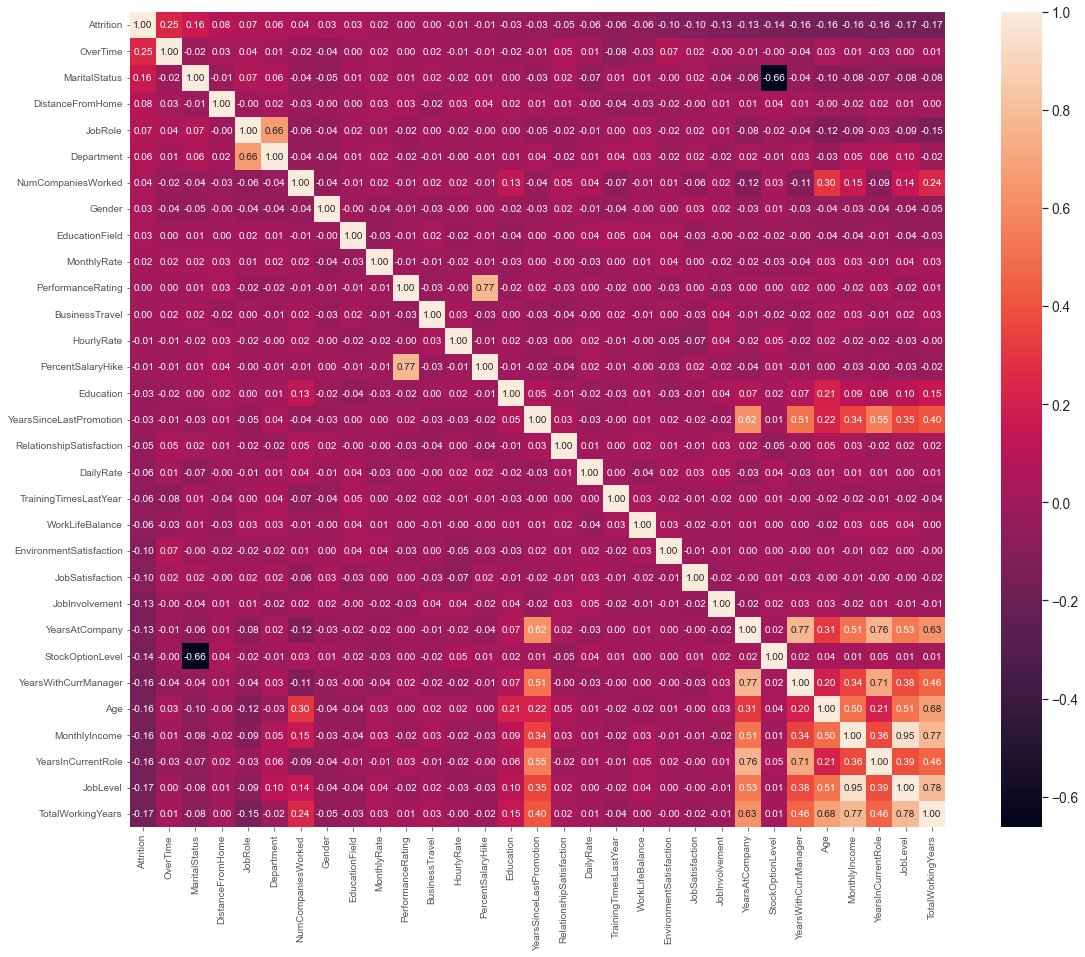

In [23]:
# Create Correlation Matrix
corrmat = encoded_df.corr()

# Attrition correlation matrix
k = 31 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'Attrition')['Attrition'].index

# Correlation Matrix
cm = np.corrcoef(encoded_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.25)

# Plot the Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Drop one of the columns where correlation between the columns is more than 75%

# Here is a graphical visualization of variables with correlation more than 75% as observed in above heatmap

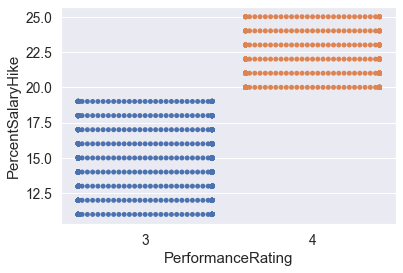

In [24]:
# Box plot PerformanceRating vs PercentSalaryHike
data = pd.concat([encoded_df['PerformanceRating'], encoded_df['PercentSalaryHike']], axis=1)
plt.figure(figsize = (6,4))
sns.swarmplot(y='PercentSalaryHike', x='PerformanceRating', data = data)
plt.show()

# Insight: PerformanceRating and PercentSalaryHike are strongly correlated. Hence drop PerformanceRating

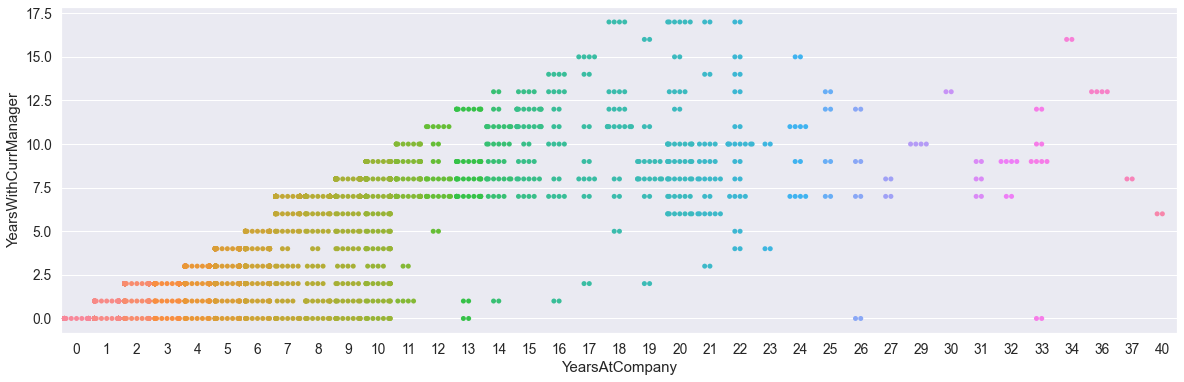

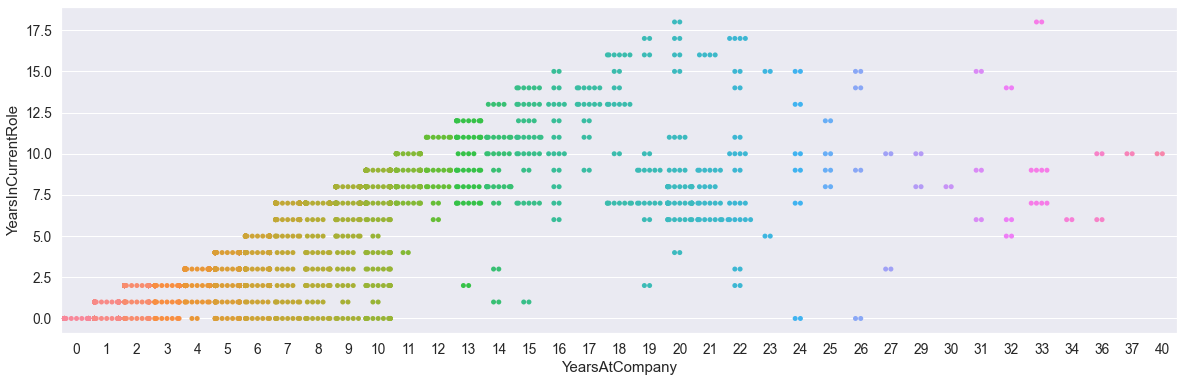

In [25]:
# Pair plot YearsAtCompany, YearsWithCurrManager and YearsInCurrentRole

data = pd.concat([df['YearsAtCompany'], df['YearsWithCurrManager'], df['YearsInCurrentRole']], axis=1)
plt.figure(figsize = (20,6))
sns.swarmplot(y='YearsWithCurrManager', x='YearsAtCompany', data = data)
plt.show()

plt.figure(figsize = (20,6))
sns.swarmplot(y='YearsInCurrentRole', x='YearsAtCompany', data = data)
plt.show()

# Insights: YearsAtCompany, YearsWithCurrManager and YearsInCurrentRole are strongly correlated. Hence drop 
# YearsWithCurrManager and YearsInCurrentRole

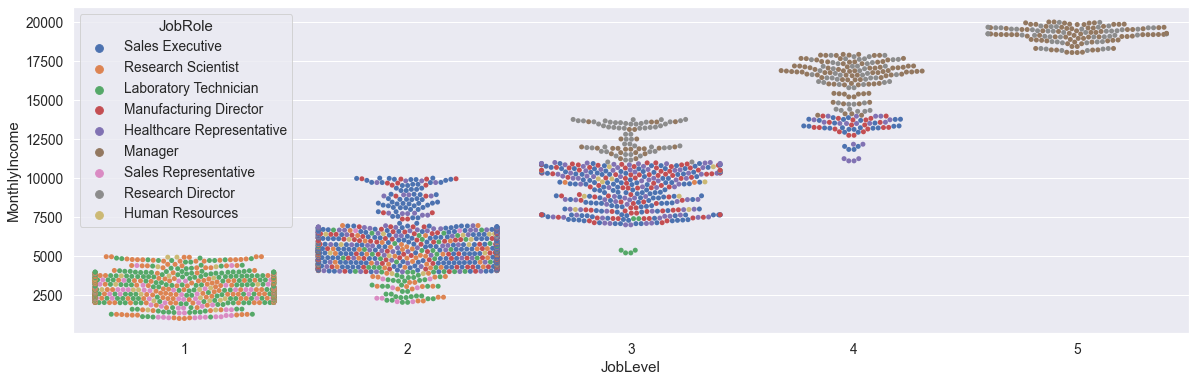

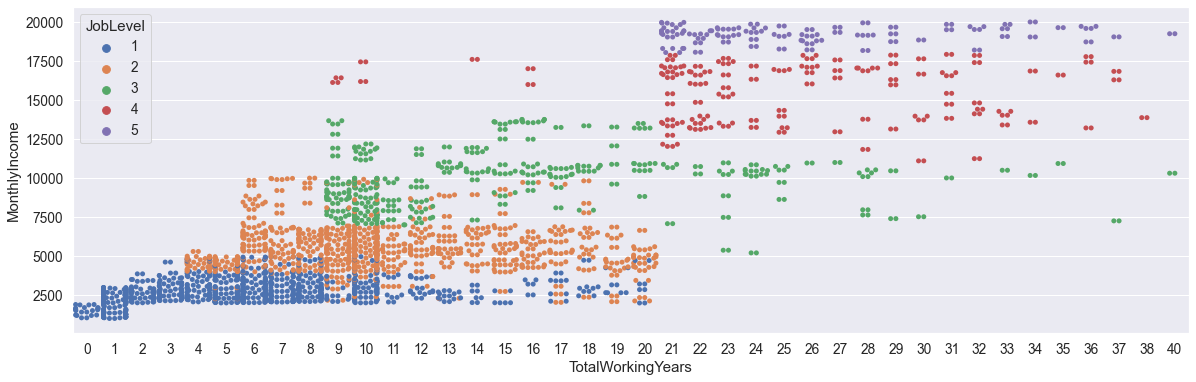

In [26]:
# Swarm plot MonthlyIncome, JobLevel and TotalWorkingYears

data = pd.concat([df['MonthlyIncome'], df['JobLevel'], df['JobRole'], df['TotalWorkingYears']], axis=1)
plt.figure(figsize = (20,6))
sns.swarmplot(y='MonthlyIncome', x='JobLevel', data = data, hue = 'JobRole')
plt.show()

#data = pd.concat([df['MonthlyIncome'], df['TotalWorkingYears']], axis=1)
plt.figure(figsize = (20,6))
sns.swarmplot(y='MonthlyIncome', x='TotalWorkingYears', data = data, hue = 'JobLevel')
plt.show()

# Insights: MonthlyIncome, JobLevel and TotalWorkingYears are strongly correlated. Hence drop TotalWorkingYears and JobLevel

In [27]:
# Columns to drop based on above correlations:
# 'PerformanceRating', 'YearsWithCurrManager', 'YearsInCurrentRole', 'TotalWorkingYears', 'JobLevel'

encoded_df.drop(['PerformanceRating', 'YearsWithCurrManager', 'YearsInCurrentRole', 'TotalWorkingYears', 'JobLevel'], 
                axis = 1, inplace = True)

In [28]:
encoded_df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

# Plot correlation matrix again after dropping strongly correlated variables

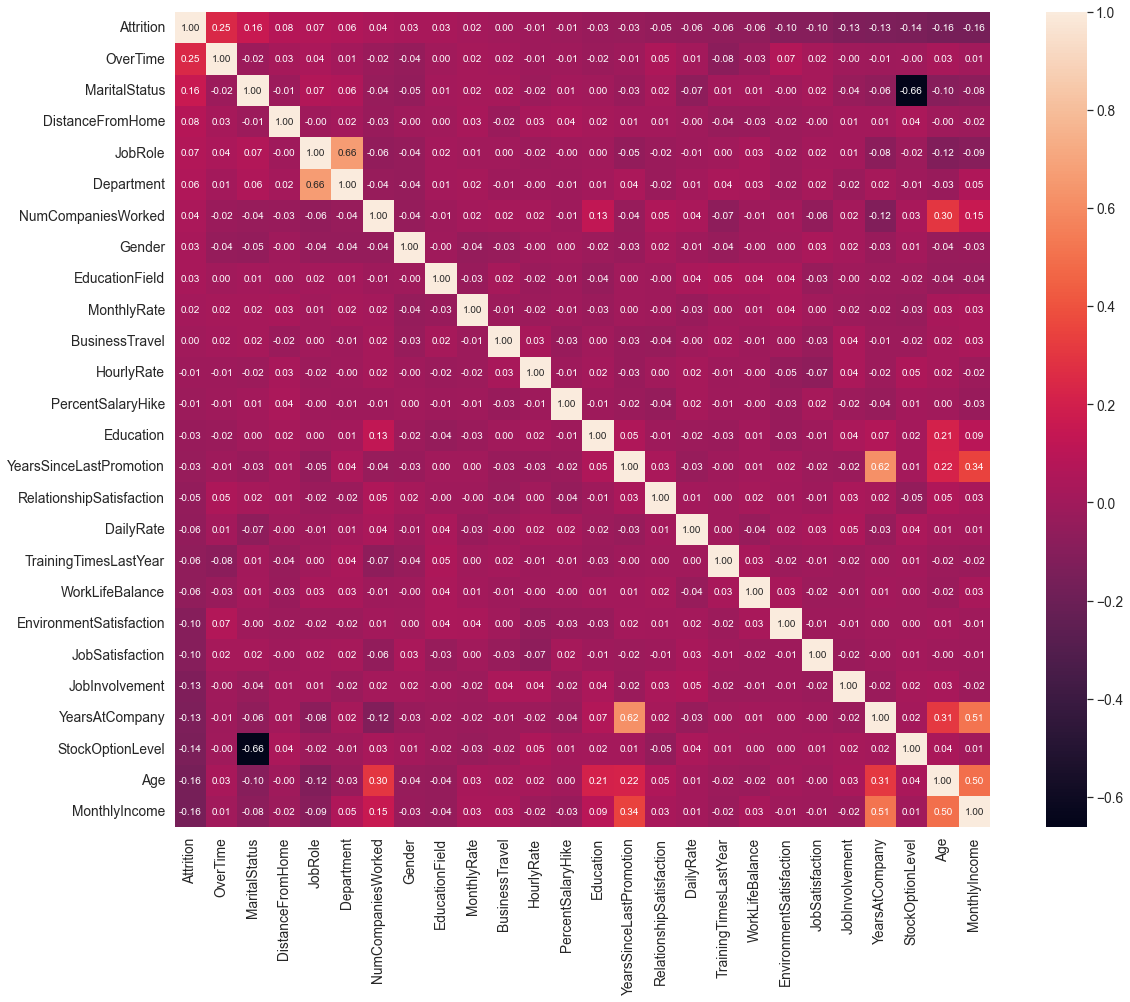

In [29]:
# Create Correlation Matrix
corrmat = encoded_df.corr()

# Attrition correlation matrix
k = 31 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'Attrition')['Attrition'].index

# Correlation Matrix
cm = np.corrcoef(encoded_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.25)

# Plot the Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Visualize Correlation of moderately Correlated variables on Target Variable

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

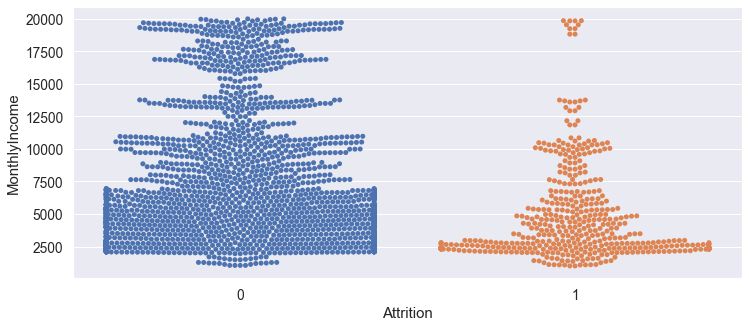

In [30]:
# MonthlyIncome vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'MonthlyIncome'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the monthly income, higher the chances of attrition. Highest attrition is in the salary range of 1000 to 3000

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

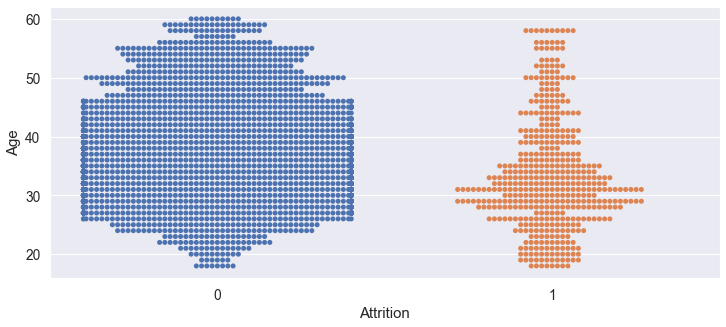

In [31]:
# Age vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'Age'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the Age, higher the chances of attrition, especially in the age bracket of 25 to 35

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

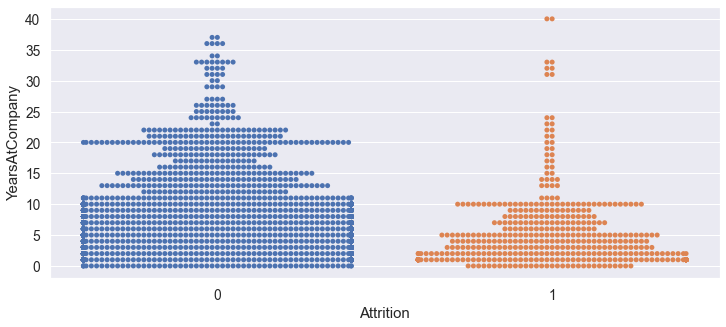

In [32]:
# YearsAtCompany vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'YearsAtCompany'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the Number of Years at Company, higher the chances of attrition, especially for employees under 5 years at the company

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

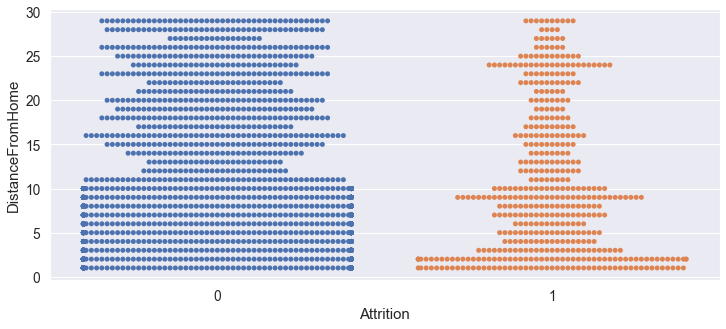

In [33]:
# DistanceFromHome vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'DistanceFromHome'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the Distance from Home, slightly higher the chances of attrition

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

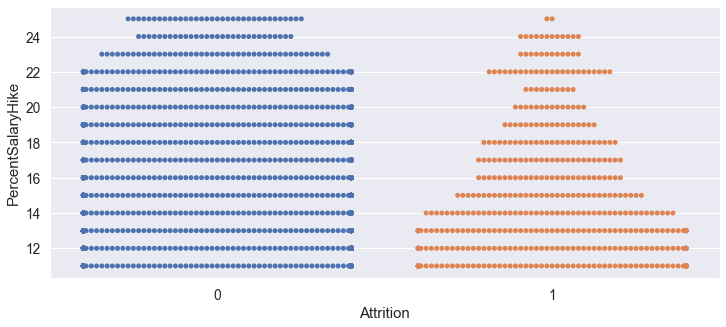

In [34]:
# PercentSalaryHike vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'PercentSalaryHike'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the Salary Hike, higher the chances of attrition

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

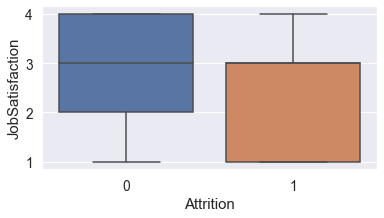

In [35]:
# JobSatisfaction vs Attrition
f, ax = plt.subplots(figsize=(6,3))
var = 'JobSatisfaction'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.boxplot(y=var, x='Attrition', data=data)

# Insights: Lower the rate of Job Satisfaction, Higher the chances of Attrition

# Remove Outliers from numeric columns / columns with maximum weight by replacing outliers with 20th and 80th Pecentile data

In [36]:
# There are 5 numeric columns in our dataset, each having outliers namely:
# "DistanceFromHome","MonthlyIncome","MonthlyRate","DailyRate","HourlyRate"

print("Before Removing Outliers")
encoded_df[["DistanceFromHome","MonthlyIncome","MonthlyRate","DailyRate","HourlyRate"]].describe()

# Insights: Idea is to replace all values above 80th Percentile with 80th percentile value and
# replace all values below 20th Percentile with 20th percentile value

Before Removing Outliers


,DistanceFromHome,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,9.192517,6502.931293,14313.103401,802.485714,65.891156
std,8.105485,4707.155770,7116.575021,403.440447,20.325969
min,1.000000,1009.000000,2094.000000,102.000000,30.000000
25%,2.000000,2911.000000,8045.000000,465.000000,48.000000
50%,7.000000,4919.000000,14235.500000,802.000000,66.000000
75%,14.000000,8380.000000,20462.000000,1157.000000,84.000000
max,29.000000,19999.000000,26999.000000,1499.000000,100.000000


In [37]:
encoded_df["DistanceFromHome"].loc[encoded_df["DistanceFromHome"] < encoded_df["DistanceFromHome"].quantile(0.20)] = encoded_df["DistanceFromHome"].quantile(0.20)
encoded_df["DistanceFromHome"].loc[encoded_df["DistanceFromHome"] > encoded_df["DistanceFromHome"].quantile(0.80)] = encoded_df["DistanceFromHome"].quantile(0.80)

In [38]:
encoded_df["MonthlyIncome"].loc[encoded_df["MonthlyIncome"] < encoded_df["MonthlyIncome"].quantile(0.20)] = encoded_df["MonthlyIncome"].quantile(0.20)
encoded_df["MonthlyIncome"].loc[encoded_df["MonthlyIncome"] > encoded_df["MonthlyIncome"].quantile(0.80)] = encoded_df["MonthlyIncome"].quantile(0.80)

In [39]:
encoded_df["MonthlyRate"].loc[encoded_df["MonthlyRate"] < encoded_df["MonthlyRate"].quantile(0.20)] = encoded_df["MonthlyRate"].quantile(0.20)
encoded_df["MonthlyRate"].loc[encoded_df["MonthlyRate"] > encoded_df["MonthlyRate"].quantile(0.80)] = encoded_df["MonthlyRate"].quantile(0.80)

In [40]:
encoded_df["DailyRate"].loc[encoded_df["DailyRate"] < encoded_df["DailyRate"].quantile(0.20)] = encoded_df["DailyRate"].quantile(0.20)
encoded_df["DailyRate"].loc[encoded_df["DailyRate"] > encoded_df["DailyRate"].quantile(0.80)] = encoded_df["DailyRate"].quantile(0.80)

In [41]:
encoded_df["HourlyRate"].loc[encoded_df["HourlyRate"] < encoded_df["HourlyRate"].quantile(0.20)] = encoded_df["HourlyRate"].quantile(0.20)
encoded_df["HourlyRate"].loc[encoded_df["HourlyRate"] > encoded_df["HourlyRate"].quantile(0.80)] = encoded_df["HourlyRate"].quantile(0.80)

In [42]:
print("After Removing Outliers")
encoded_df[["DistanceFromHome","MonthlyIncome","MonthlyRate","DailyRate","HourlyRate"]].describe()

After Removing Outliers


,DistanceFromHome,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,8.114966,5643.791293,14293.930340,805.409524,66.015646
std,5.757583,2719.735935,5767.356603,323.539055,16.337139
min,2.000000,2695.800000,6887.400000,391.800000,45.000000
25%,2.000000,2911.000000,8045.000000,465.000000,48.000000
50%,7.000000,4919.000000,14235.500000,802.000000,66.000000
75%,14.000000,8380.000000,20462.000000,1157.000000,84.000000
max,17.000000,9860.000000,21712.000000,1224.200000,87.000000


In [43]:
# Create a copy of our dataset before standardization for future use in Naive Bayes Classifier as it does not work 
# with standardised data due to presence of negative values

encoded_df_nb = encoded_df.copy(deep = True)

# Feature Scaling / Standardization

In [44]:
# Save the Target Variable "Attrition" in variable y before standardization as Target Variable should not be standardised
y = encoded_df['Attrition'].values

In [45]:
cols = list(encoded_df.columns)
cols = cols[1:26]

data = encoded_df.iloc[:, 1:].values  

#standardize the data to normal distribution
dataset1_standardized = preprocessing.scale(data)
encoded_df1 = pd.DataFrame(dataset1_standardized, columns = cols)    # encoded_df1 is the dataset without the target variable

In [46]:
# Save the standardised values of variables in x
x = encoded_df1.values

In [47]:
# # Save the encoded dataframe as a csv file for future visualization
# encoded_df1.to_csv("interim_output.csv")

# Split Training and Testing Data in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [48]:
# For later use in CART models to calculate Variable Importance. Variable names_index should contain only the 
# names of dependent variables and not the Target Variable "Attrition" in this case.

names = ['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion']

names_index = names[1:]


# Confusion Matrix

In [49]:
# Function to plot Confusion Matrix. Callable in future from all models

def create_conf_mat(ytest , pred, model_name):
    sns.set(rc = {'figure.figsize':(2,2)})
    if (len(ytest .shape) != len(pred.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (ytest .shape != pred.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = ytest, columns = pred)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
   
        sns.heatmap(test_crosstb, annot=True, fmt='d', cbar=False)
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title(model_name)
        plt.show()

# Area Under Curve

In [50]:
# Function to plot AUC (Area Under Curve). Callable in future from all models

def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):

    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'dt': ['Decision Tree', 'darkgreen'],
              'nn': ['Neural Network', 'purple'],
              'svm':['Support Vector Machines', 'blue'],
              'log':['Logistic Regression', 'orange'],
              'nb' :['Naive Bayes Classifier', 'brown']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.2f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)                          # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

# Classification Report

In [51]:
# Function to print Classification Report. Callable in future from all models

def print_class_report(predictions, y_t, target, alg_name):

    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, y_t, target_names = target))

# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Decision Tree Classifier

In [52]:
model_dt = DecisionTreeClassifier(random_state=42)

# Hyper-Parameter Optimization using GridSearchCV (Cross Validation)

In [53]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# np.random.seed(1)
# start = time.time()

# param_dist = {'max_depth': [5, 10, 15, 20, 25, 30, 50],
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'criterion': ['gini', 'entropy'],
#               'min_samples_split' : [3, 6, 10, 15],
#               'min_samples_leaf' : [2, 4, 6, 8]}

# cv_dt = GridSearchCV(model_dt, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = -1)                 # n_jobs should be 1 less than number of CPU cores. -1 means all cores

# cv_dt.fit(x_train, y_train)
# print('Best Parameters using grid search: \n', cv_dt.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))


# Decision Tree Classifier Model

In [54]:
# Set best parameters given by grid search CV
model_dt.set_params(max_depth=20, 
                    criterion="gini", 
                    min_samples_split=100, 
                    min_samples_leaf=10, 
                    max_features = None)

model_dt.fit(x_train, y_train)

model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)

model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.8818027210884354
Testing score:  0.8367346938775511


In [55]:
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Predictions & Evaluations (AUC, Confusion Matrix & Classification Report)

In [56]:
# Calculate Accuracy and Error Rate

test_error_rate_dt = 1 - model_dt_score_test

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(model_dt_score_test))
print("\nThe test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_dt))

Here is our mean accuracy on the test set:
 0.837

The test error rate for our model is:
  0.1633


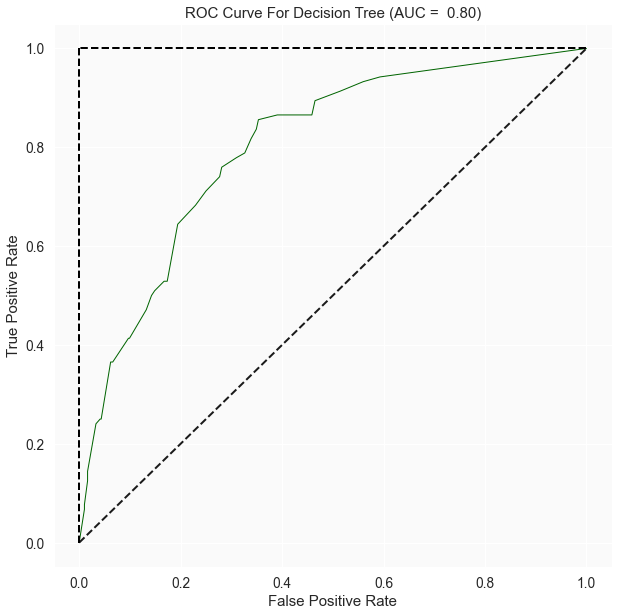

In [57]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr_dt, tpr_dt, auc_dt, 'dt')

In [58]:
predictions = model_dt.predict(x_test)

[[454  30]
 [ 66  38]]


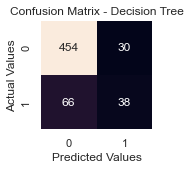

In [59]:
# Call Confusion Matrix Plotting function
print(confusion_matrix(y_test, predictions))  
create_conf_mat(y_test, predictions, "Confusion Matrix - Decision Tree")

# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Random Forest Classifier Model

In [60]:
# Split the dataset for training and testing
x1 = encoded_df1.iloc[:, encoded_df1.columns != 'Attrition']
y1 = encoded_df.iloc[:, encoded_df.columns == 'Attrition']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.20, random_state = 42)

In [61]:
# Cleaning test sets to avoid future warning messages
y_train1 = y_train1.values.ravel() 
y_test1 = y_test1.values.ravel() 

In [62]:
# Random Forest Classifier: Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

## Hyper-Parameter Optimization using GridSearchCV (Cross Validation)

In [63]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# np.random.seed(42)
# start = time.time()

# param_dist = {'max_depth': [12, 15, 20, 25],
#               'bootstrap': [True, False],
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'criterion': ['gini', 'entropy'],
#               'min_samples_split' : [3, 6, 10, 15, 30],
#               'min_samples_leaf' : [2, 4, 6, 8]}

# # Here we can add 'n_estimator' : [400, 500, 600...], 'min_samples_split' : [5, 10, 15, 20, 30], 
# # 'min_samples_leaf' : [2, 3, 4, 5, 7] but that will consume lot of resources and increase computational time
# # Hence calculate OOB Error Rate and manually put the n_estimator value later

# cv_rf = GridSearchCV(fit_rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = -1)                 # n_jobs should be 1 less than number of CPU cores. -1 means all cores

# cv_rf.fit(x_train1, y_train1)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

# # Insight: Best Parameters: criterion='gini', max_depth=20, max_features='log2', min_samples_leaf=2, min_samples_split=5

In [64]:
# Set best parameters given by grid search 
fit_rf.set_params(max_depth=20, 
                  criterion="gini", 
                  min_samples_split=5, 
                  min_samples_leaf=2, 
                  max_features = 'log2')

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

# OOB (Out of Bag) Error Rate

In [65]:
# fit_rf.set_params(warm_start=True, oob_score=True)
 
# min_estimators = 15
# max_estimators = 1500

# error_rate = {}

# for i in range(min_estimators, max_estimators + 1):
#     fit_rf.set_params(n_estimators=i)
#     fit_rf.fit(x_train1, y_train1)

#     oob_error = 1 - fit_rf.oob_score_
#     error_rate[i] = oob_error
    
# # Insights: Stable n_estimator is found to be around 1200 from the OOB plot

In [66]:
# # Convert dictionary to a pandas series for easy plotting 
# oob_series = pd.Series(error_rate)

In [67]:
# fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_facecolor('#fafafa')

# oob_series.plot(kind='line',color = 'red')
# plt.axhline(0.055, color='#875FDB',linestyle='--')
# plt.axhline(0.05, color='#875FDB',linestyle='--')
# plt.xlabel('n_estimators')
# plt.ylabel('OOB Error Rate')
# plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1500 trees)')

In [68]:
# print('OOB Error rate for 650 trees is: {0:.5f}'.format(oob_series[1200]))

In [69]:
# Refine the tree via OOB Output for n_estimators
# n_estimators is the number of trees we want to build before taking the maximum voting or averages of predictions

fit_rf.set_params(n_estimators=1200,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1200, random_state=42)

In [70]:
# Train the Random Forest
fit_rf.fit(x_train1, y_train1)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1200, random_state=42)

# Variable Importance

In [71]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [72]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [73]:
# Check if the lengths of importances_rf, indices_rf, names_index are same. If not, there might be some error in names_index 
# earlier in the code

print("Length of importances_rf : ", len(importances_rf))
print("Length of indices_rf     : ", len(indices_rf))
print("Length of names_index    : ", len(names_index))

Length of importances_rf :  25
Length of indices_rf     :  25
Length of names_index    :  25


In [74]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [75]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'MonthlyIncome' has a Mean Decrease in Impurity of 0.08569
2. The feature 'Age' has a Mean Decrease in Impurity of 0.08166
3. The feature 'YearsAtCompany' has a Mean Decrease in Impurity of 0.06862
4. The feature 'OverTime' has a Mean Decrease in Impurity of 0.06613
5. The feature 'DailyRate' has a Mean Decrease in Impurity of 0.04977
6. The feature 'DistanceFromHome' has a Mean Decrease in Impurity of 0.04945
7. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.04701
8. The feature 'HourlyRate' has a Mean Decrease in Impurity of 0.04549
9. The feature 'NumCompaniesWorked' has a Mean Decrease in Impurity of 0.04448
10. The feature 'PercentSalaryHike' has a Mean Decrease in Impurity of 0.04371
11. The feature 'JobRole' has a Mean Decrease in Impurity of 0.03921
12. The feature 'EnvironmentSatisfaction' has a Mean Decrease in Impurity of 0.03828
13. The feature 'StockOptionLevel' has a Mean Decrease in Impurity of 0.03546
14. The feature 'JobS

In [76]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    #ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 25)                 # Limit should be from -1 to the length of the dataset (i.e. number of dependent variables)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    #plt.close()

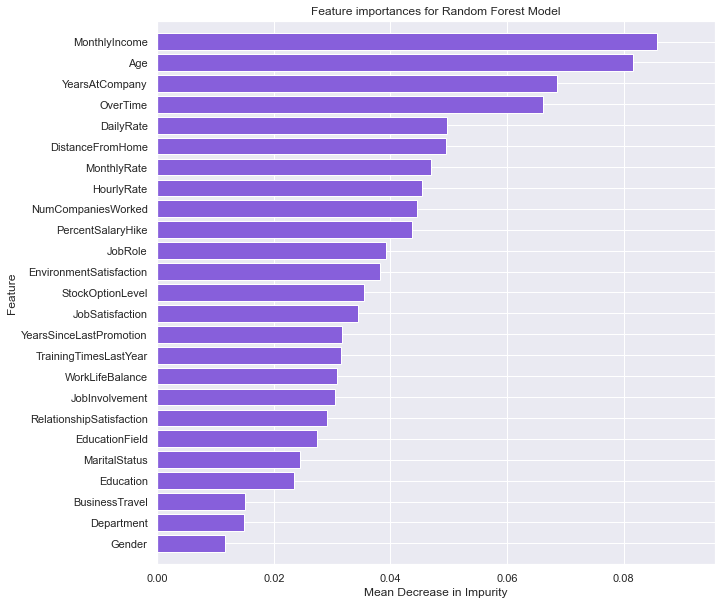

In [77]:
# Most important variables contributing to the Target Variable in descending order of their importance
# The same observations are noticed in EDA as well

variable_importance_plot(importances_rf, indices_rf, names_index)

# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [78]:
predictions_rf = fit_rf.predict(x_test1)

[[489   0]
 [ 36  63]]


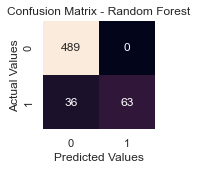

In [79]:
# Call Confusion Matrix Plotting function
print(confusion_matrix(y_test1, predictions_rf))  
create_conf_mat(y_test1, predictions_rf, "Confusion Matrix - Random Forest")

# Accuracy & Error Rate

In [80]:
# Calculate Accuracy and Error Rate

accuracy_rf = fit_rf.score(x_test1, y_test1)
test_error_rate_rf = 1 - accuracy_rf

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))
print("\nThe test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

Here is our mean accuracy on the test set:
 0.939

The test error rate for our model is:
  0.0612


# Area Under Curve (AUC)

In [81]:
# We grab the second array from the output which corresponds to
# the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

predictions_prob = fit_rf.predict_proba(x_test1)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test1,
                          predictions_prob,
                          pos_label = 1)

In [82]:
auc_rf = auc(fpr2, tpr2)

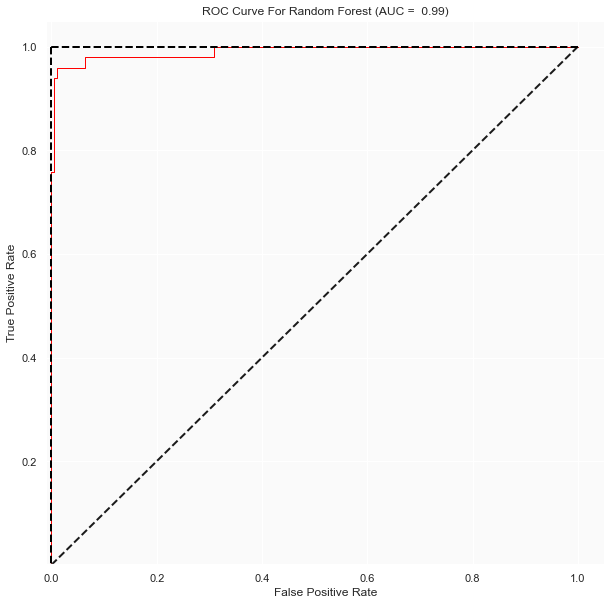

In [83]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [84]:
# Call functiont to print Classification Report
class_report = print_class_report(predictions_rf, y_test1, dx, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       1.00      0.93      0.96       525
         Yes       0.64      1.00      0.78        63

    accuracy                           0.94       588
   macro avg       0.82      0.97      0.87       588
weighted avg       0.96      0.94      0.94       588



# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# K Nearest Neighbor (KNN)

# Train Test Split

In [85]:
# x_train, x_test, y_train, y_test already available from Decision Tree Model

# Pre-Processing and Standardization

In [86]:
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

# Detection of Optimal Value for K Neighnours

In [87]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1, y_train1)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

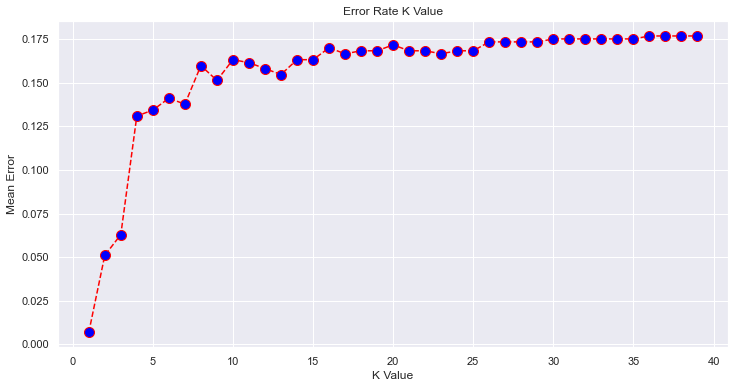

In [88]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

# Insights: The value of K for highest accuracy is 1

# K-Nearest Neighbours Classifier

In [89]:
# In the Detection of Optimal Value for K Neighnours plot 1 shows stable result

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=1)

# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [90]:
y_pred = classifier.predict(x_test)  

In [91]:
# We grab the second array from the output which corresponds to
# the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

pred_prob = classifier.predict_proba(x_test)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, pred_prob, pos_label = 1)

# Accuracy and Error Rate

In [92]:
# Calculate Accuracy and Error Rate

accuracy_knn = classifier.score(x_test, y_test)
test_error_rate_knn = 1 - accuracy_knn

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_knn))
print("\nThe test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_knn))

Here is our mean accuracy on the test set:
 0.935

The test error rate for our model is:
  0.0646


In [93]:
auc_knn = auc(fpr3, tpr3)

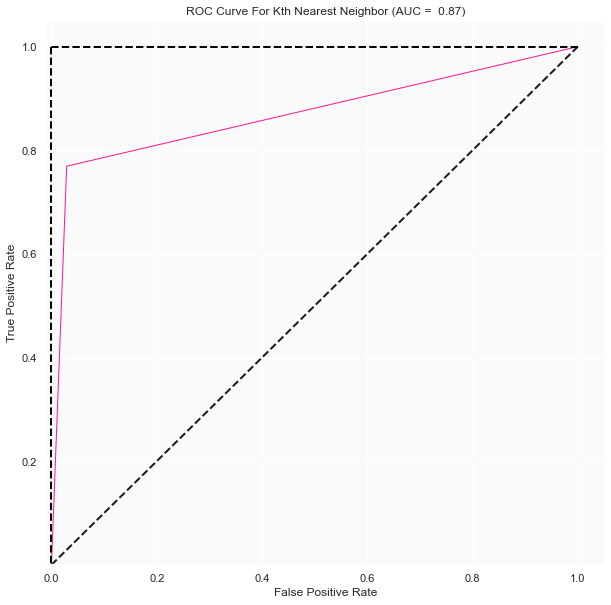

In [94]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr3, tpr3, auc_knn, 'knn', xlim=(-0.01, 1.05), ylim=(0.001, 1.05))

[[470  14]
 [ 24  80]]


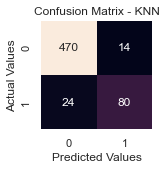

In [95]:
# Call function to plot Confusion Matrix
print(confusion_matrix(y_test, y_pred))  
conf_mat = create_conf_mat(y_test, y_pred, "Confusion Matrix - KNN")

In [96]:
# Print Classification Report:

class_report = print_class_report(y_pred, y_test, dx, 'K Nearest Neighbor')
# f1 Score = 2 * (precision * recall)/ (precision + recall) ie how good my model is in predicting 1 as 1 and 0 as 0

Classification Report for K Nearest Neighbor:
              precision    recall  f1-score   support

          No       0.97      0.95      0.96       494
         Yes       0.77      0.85      0.81        94

    accuracy                           0.94       588
   macro avg       0.87      0.90      0.88       588
weighted avg       0.94      0.94      0.94       588



# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Support Vector Machines (SVM)

# SVM with default HyperParameters

In [97]:
# With Default hyperparameters
svc=SVC() 
svc.fit(x_train,y_train)
y_pred_svm=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_svm))

Accuracy Score:
0.8826530612244898


# Accuracy Scores with Parameter Optimization

# Kernel Parameter

In [98]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Linear Kernel:
# svc=SVC(kernel='linear')
# svc.fit(x_train,y_train)
# y_pred_svm=svc.predict(x_test)
# print('\nAccuracy Score for Linear Kernel: ', metrics.accuracy_score(y_test,y_pred_svm))

# # Polynomial Kernel:
# svc=SVC(kernel='poly')
# svc.fit(x_train,y_train)
# y_pred_svm=svc.predict(x_test)
# print('Accuracy Score for Polynomial Kernel: ', metrics.accuracy_score(y_test,y_pred_svm))


# Optimizing Hyper Parameter C

In [99]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Optimizing the HyperParameter C

# C_range=list(range(1,26))
# acc_score=[]
# for c in C_range:
#     svc = SVC(kernel='linear', C=c)
#     scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
#     acc_score.append(scores.mean())
# #print(acc_score)   

In [100]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)

# C_values=list(range(1,26))
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(0,27,2))
# plt.xlabel('Value of C for SVC')
# plt.ylabel('Cross-Validated Accuracy')

In [101]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Find the exact value of C up to 1 place of decimal

# C_range=list(np.arange(0.1,6,0.1))
# acc_score=[]
# for c in C_range:
#     svc = SVC(kernel='linear', C=c)
#     scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
#     acc_score.append(scores.mean())
# #print(acc_score)    


# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)

# C_values=list(np.arange(0.1,6,0.1))
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(0.0,6,0.3))
# plt.xlabel('Value of C for SVC ')
# plt.ylabel('Cross-Validated Accuracy')

# Optimizing Hyper Parameter Gamma

In [102]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Optimizing the HyperParameter Gamma

# gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
# acc_score=[]
# for g in gamma_range:
#     svc = SVC(kernel='rbf', gamma=g)
#     scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
#     acc_score.append(scores.mean())
# print(acc_score)  


# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)

# gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
# plt.plot(gamma_range,acc_score)
# plt.xlabel('Value of gamma for SVC ')
# plt.xticks(np.arange(0.0001,100,5))
# plt.ylabel('Cross-Validated Accuracy')



# Hyper-Parameter Optimization using GridSearchCV (Cross Validation)

In [103]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# svm_model= SVC()
# tuned_parameters = {'C': (np.arange(0.1,2,0.1)), 
#                     'gamma': [0.01,0.02,0.03,0.04,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
#                     'kernel':['poly','rbf','linear'], 
#                     'degree': [1, 2, 3, 4, 5, 6, 7]}

# fit_svm = GridSearchCV(svm_model, tuned_parameters, cv=10, scoring='accuracy', n_jobs = -1)
# fit_svm.fit(x_train, y_train)
# print("Accuracy: ", fit_svm.best_score_)
# print("Parameters: ", fit_svm.best_params_)

# # Insights: Accuracy = 0.9583 for {'C': 0.1, 'degree': 5, 'gamma': 0.2, 'kernel': 'poly'}

# Support Vector Machine (SVM) Classifier

In [104]:
svm_model= SVC(probability=True)
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['poly'], 'gamma': [0.2], 'degree': [5]
                   }

fit_svm = GridSearchCV(svm_model, tuned_parameters, cv=10, scoring='accuracy', n_jobs = -1)
fit_svm.fit(x_train, y_train)
print("Accuracy: ", fit_svm.best_score_)
print("Parameters: ", fit_svm.best_params_)

Accuracy:  0.9591831950955644
Parameters:  {'C': 0.1, 'degree': 5, 'gamma': 0.2, 'kernel': 'poly'}


# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [105]:
y_pred_svm = fit_svm.predict(x_test)

[[480   4]
 [ 32  72]]


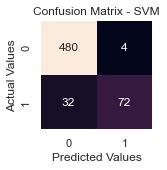

In [106]:
# Call function to plot Confusion Matrix
print(confusion_matrix(y_test, y_pred_svm))  
conf_mat = create_conf_mat(y_test, y_pred_svm, "Confusion Matrix - SVM")

# Accuracy and Error Rate

In [107]:
# We grab the second array from the output which corresponds to
# the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

pred_prob = fit_svm.predict_proba(x_test)[:, 1]

fpr4, tpr4, _ = roc_curve(y_test,
                          pred_prob,
                          pos_label = 1)

In [108]:
# Calculate Accuracy and Error Rate

accuracy_svm = fit_svm.score(x_test, y_test)
test_error_rate_svm = 1 - accuracy_svm

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_svm))
print("\nThe test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_svm))

Here is our mean accuracy on the test set:
 0.939

The test error rate for our model is:
  0.0612


# Area Under Curve (AUC)

In [109]:
auc_svm = auc(fpr4, tpr4)

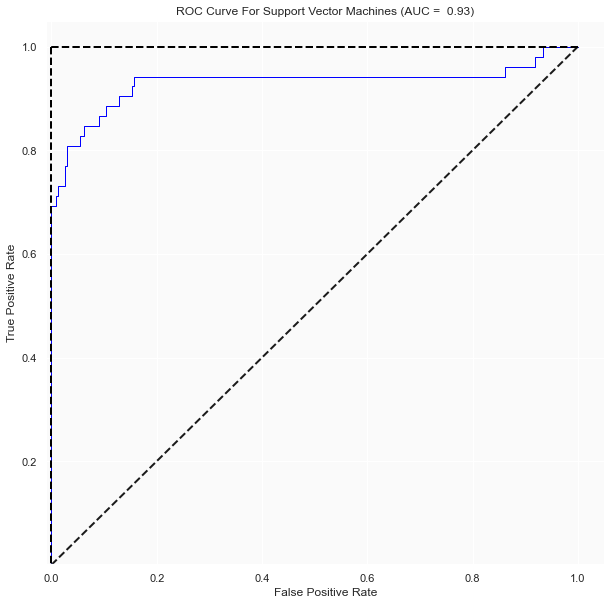

In [110]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr4, tpr4, auc_svm, 'svm', xlim=(-0.01, 1.05), ylim=(0.001, 1.05))

In [111]:
# Print Classification Report:

class_report = print_class_report(y_pred_svm, y_test, dx, 'Support Vector Machines')
# f1 Score = 2 * (precision * recall)/ (precision + recall) ie how good my model is in predicting 1 as 1 and 0 as 0

Classification Report for Support Vector Machines:
              precision    recall  f1-score   support

          No       0.99      0.94      0.96       512
         Yes       0.69      0.95      0.80        76

    accuracy                           0.94       588
   macro avg       0.84      0.94      0.88       588
weighted avg       0.95      0.94      0.94       588



# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Logistic Regression Classifier

In [112]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression()

# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [113]:
y_pred_log=logreg.predict(x_test)

[[474  10]
 [ 79  25]]


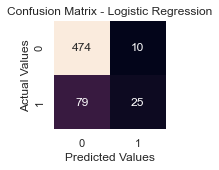

In [114]:
# Call function to plot Confusion Matrix
print(confusion_matrix(y_test, y_pred_log))  
conf_mat_log = create_conf_mat(y_test, y_pred_log, "Confusion Matrix - Logistic Regression")

# Accuracy & Error Rate

In [115]:
accuracy_log = metrics.accuracy_score(y_test, y_pred_log)
Precision_log = metrics.precision_score(y_test, y_pred_log)
recall_log = metrics.recall_score(y_test, y_pred_log)

print("Accuracy:",accuracy_log)
print("Precision:",Precision_log)
print("Recall:",recall_log)

Accuracy: 0.8486394557823129
Precision: 0.7142857142857143
Recall: 0.2403846153846154


# Area Under Curve (AUC)

In [116]:
y_pred_proba_log = logreg.predict_proba(x_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_log)
auc_log = metrics.roc_auc_score(y_test, y_pred_proba_log)

In [117]:
auc_log = auc(fpr5, tpr5)

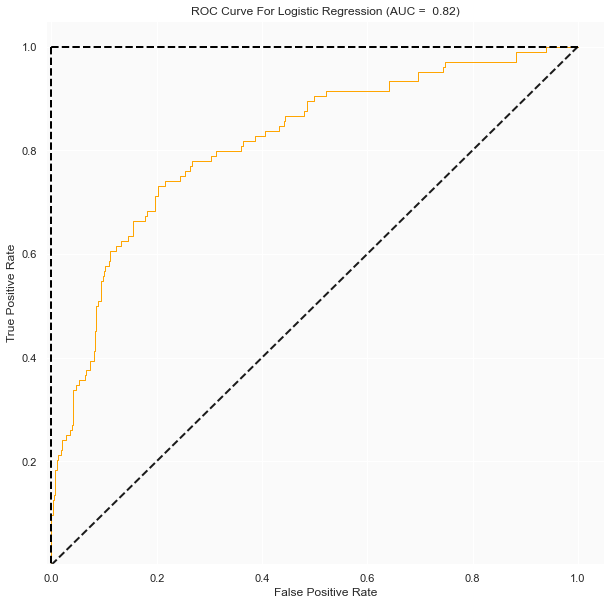

In [118]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr5, tpr5, auc_log, 'log', xlim=(-0.01, 1.05), ylim=(0.001, 1.05))

In [119]:
# Print Classification Report:

class_report = print_class_report(y_pred_log, y_test, dx, 'Logistic Regression')
# f1 Score = 2 * (precision * recall)/ (precision + recall) ie how good my model is in predicting 1 as 1 and 0 as 0

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.98      0.86      0.91       553
         Yes       0.24      0.71      0.36        35

    accuracy                           0.85       588
   macro avg       0.61      0.79      0.64       588
weighted avg       0.94      0.85      0.88       588



# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Naive Bayes Classifier (for Numerical Data)

In [120]:
xNB = encoded_df_nb.iloc[:, encoded_df_nb.columns != 'Attrition']
yNB = encoded_df_nb.iloc[:, encoded_df_nb.columns == 'Attrition']

X_trainNB, X_testNB, y_trainNB, y_testNB = train_test_split(xNB, yNB, test_size=0.2, random_state=42)

In [121]:
# Cleaning test sets to avoid future warning messages
y_trainNB = y_trainNB.values.ravel() 
y_testNB = y_testNB.values.ravel() 

In [122]:
nb = MultinomialNB()
nb.fit(X_trainNB, y_trainNB)

MultinomialNB()

# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [123]:
y_pred_nb = nb.predict(X_testNB)

[[272 217]
 [ 47  52]]


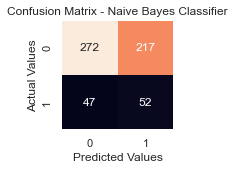

In [124]:
# Call function to plot Confusion Matrix
print(confusion_matrix(y_testNB, y_pred_nb))  
conf_mat_NB = create_conf_mat(y_testNB, y_pred_nb, "Confusion Matrix - Naive Bayes Classifier")

# Accuracy and Error Rate

In [125]:
# We grab the second array from the output which corresponds to
# the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

pred_prob_NB = nb.predict_proba(X_testNB)[:, 1]

fpr6, tpr6, _ = roc_curve(y_testNB,
                          pred_prob_NB,
                          pos_label = 1)

In [126]:
# Calculate Accuracy and Error Rate

accuracy_NB = nb.score(X_testNB, y_testNB)
test_error_rate_NB = 1 - accuracy_NB

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_NB))
print("\nThe test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_NB))

Here is our mean accuracy on the test set:
 0.551

The test error rate for our model is:
  0.4490


# Area Under Curve (AUC)

In [127]:
y_pred_proba_NB = nb.predict_proba(X_testNB)[::,1]
auc_NB = metrics.roc_auc_score(y_testNB, y_pred_proba_NB)

In [128]:
auc_NB = auc(fpr6, tpr6)

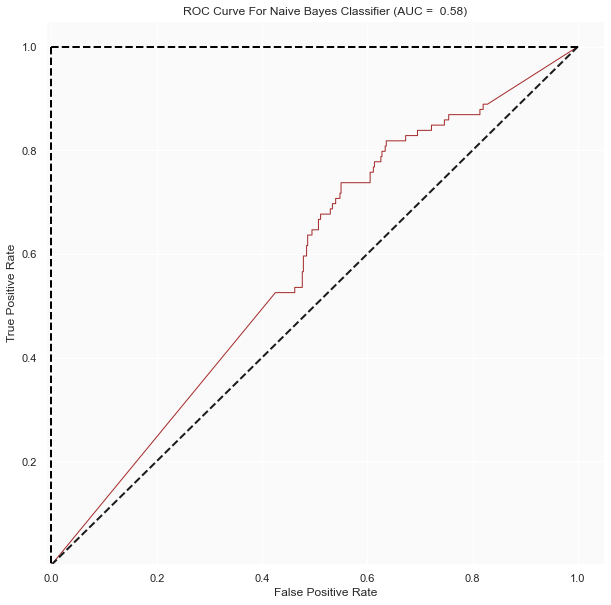

In [129]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr6, tpr6, auc_NB, 'nb', xlim=(-0.01, 1.05), ylim=(0.001, 1.05))

In [130]:
# Print Classification Report:

class_report = print_class_report(y_pred_nb, y_testNB, dx, 'Naive Bayes Classifier')
# f1 Score = 2 * (precision * recall)/ (precision + recall) ie how good my model is in predicting 1 as 1 and 0 as 0

Classification Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

          No       0.56      0.85      0.67       319
         Yes       0.53      0.19      0.28       269

    accuracy                           0.55       588
   macro avg       0.54      0.52      0.48       588
weighted avg       0.54      0.55      0.49       588



# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Final Model Comparison:

# Confusion Matrix Comparison Between Models


DECISION TREE:
Mean accuracy on test set:  0.837
Area Under the Curve (AUC):  0.802


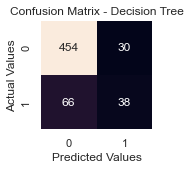


RANDOM FOREST:
Mean accuracy on test set:  0.939
Area Under the Curve (AUC):  0.992


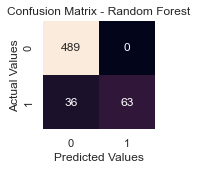


K NEAREST NEIGHBORS:
Mean accuracy on test set:  0.935
Area Under the Curve (AUC):  0.87


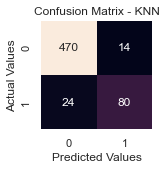


SUPPORT VECTOR MACHINES:
Mean accuracy on test set:  0.939
Area Under the Curve (AUC):  0.931


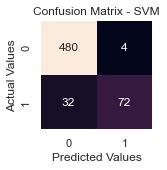


LOGISTIC REGRESSION:
Mean accuracy on test set:  0.849
Area Under the Curve (AUC):  0.816


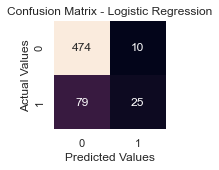


NAIVE BAYES CLASSIFIER:
Mean accuracy on test set:  0.551
Area Under the Curve (AUC):  0.577


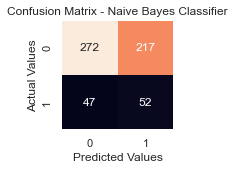

In [131]:
print("\nDECISION TREE:")  
print("Mean accuracy on test set: ", round(model_dt_score_test, 3))
print("Area Under the Curve (AUC): ", round(auc_dt, 3))
create_conf_mat(y_test, predictions, "Confusion Matrix - Decision Tree")

print("\nRANDOM FOREST:")  
print("Mean accuracy on test set: ", round(accuracy_rf, 3))
print("Area Under the Curve (AUC): ", round(auc_rf, 3))
create_conf_mat(y_test1, predictions_rf, "Confusion Matrix - Random Forest")

print("\nK NEAREST NEIGHBORS:")  
print("Mean accuracy on test set: ", round(accuracy_knn, 3))
print("Area Under the Curve (AUC): ", round(auc_knn, 3))
create_conf_mat(y_test, y_pred, "Confusion Matrix - KNN")

print("\nSUPPORT VECTOR MACHINES:") 
print("Mean accuracy on test set: ", round(accuracy_svm, 3))
print("Area Under the Curve (AUC): ", round(auc_svm, 3))
create_conf_mat(y_test, y_pred_svm, "Confusion Matrix - SVM")

print("\nLOGISTIC REGRESSION:") 
print("Mean accuracy on test set: ", round(accuracy_log, 3))
print("Area Under the Curve (AUC): ", round(auc_log, 3))
create_conf_mat(y_test, y_pred_log, "Confusion Matrix - Logistic Regression")

print("\nNAIVE BAYES CLASSIFIER:") 
print("Mean accuracy on test set: ", round(accuracy_NB, 3))
print("Area Under the Curve (AUC): ", round(auc_NB, 3))
create_conf_mat(y_testNB, y_pred_nb, "Confusion Matrix - Naive Bayes Classifier")

# INSIGHTS: SVM Model produces the highest accuracy of 95.9%

# Mean Accuracy and AUC Comparison Between Models

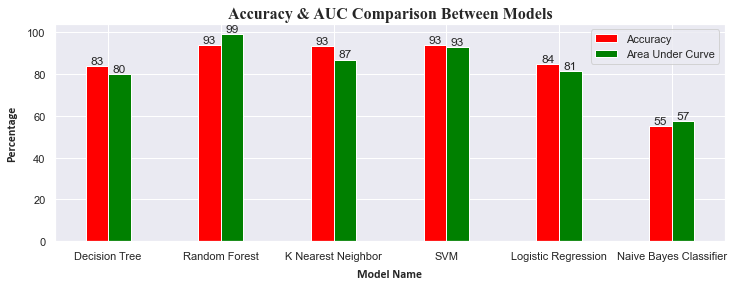

In [132]:
# Create a list of tuples with Mean Accuracy of all models:
acc_comparison = [('Decision Tree', (model_dt_score_test*100).round(2)), 
                  ('Random Forest', (accuracy_rf*100).round(2)), 
                  ('K Nearest Neighbor', (accuracy_knn*100).round(2)), 
                  ('SVM', (accuracy_svm*100).round(2)), 
                  ('Logistic Regression', (accuracy_log*100).round(2)),
                  ('Naive Bayes Classifier', (accuracy_NB*100).round(2))]

# Sort the above list of tuples in descending order of Accuracy:
#acc_comparison.sort(key = lambda x: x[1], reverse = True)
acc_comparison = dict(acc_comparison)

# Create a list of tuples with Area Under Curve of all models:
auc_comparison = [('Decision Tree', (auc_dt*100).round(2)), 
                  ('Random Forest', (auc_rf*100).round(2)), 
                  ('K Nearest Neighbor', (auc_knn*100).round(2)), 
                  ('SVM', (auc_svm*100).round(2)), 
                  ('Logistic Regression', (auc_log*100).round(2)),
                  ('Naive Bayes Classifier', (auc_NB*100).round(2))]

# Sort the above list of tuples in descending order of AUC:
#auc_comparison.sort(key = lambda x: x[1], reverse = True)
auc_comparison = dict(auc_comparison)

# Plot a bar graph to compare the result
fig = plt.figure(figsize = (12,4))
X_axis = np.arange(len(acc_comparison.keys()))  

plt.bar(X_axis - 0.1, acc_comparison.values(), 0.2, color = "Red", label = "Accuracy")
plt.bar(X_axis + 0.1, auc_comparison.values(), 0.2, color = "Green", label = "Area Under Curve")

plt.xticks(X_axis, acc_comparison.keys())
plt.title("Accuracy & AUC Comparison Between Models", fontsize=16, fontweight='bold', fontname='times new roman')
plt.xlabel("Model Name", fontsize=12, labelpad=8, fontweight='bold', fontname='calibri')
plt.ylabel("Percentage", fontsize=12, labelpad=10, fontweight='bold', fontname='calibri')

lst1 = list(acc_comparison.values())
model_lst = list(acc_comparison.keys())
lst2 = list(auc_comparison.values())

for i in range(len(lst1)):    
    plt.annotate(int(lst1[i]), xy=(i-0.1, lst1[i]), ha='center', va='bottom', fontsize = 12)
    plt.annotate(int(lst2[i]), xy=(i+0.1, lst2[i]), ha='center',  va='bottom', fontsize = 12)
    
plt.legend()

# Insights: SVM consistently produces the highest Accuracy and AUC with the least difference between Accuracy and AUC, 
# followed by Random Forest and K-nn

# Final Summary of Insights

In [133]:
# Understanding the Dataset:

# Insight 1 : The dataset has 2940 rows and 35 columns
# Insight 2 : There are 9 object type variable columns that we will either drop or convert to numeric
# Insight 3 : There is no missing data in any of the columns
# Insight 4 : There are more males than females in the dataset
# Insight 5 : Males are slightly more likely to quit (17%) than Females (14.8%)
# Insight 6 : Attrition is high for Single Employees (25.5%) compared to Married (12.5%) and Divorced (10%)
# Insight 7 : Employees working overtime has a much higher Attrition (30%) than employees not working overtime (10%)
# Insight 8 : Attrition is highest among employees who travel frequently (25%), folowed by those who travel rarely (15%)
# Insight 9 : Attrition is highest in Sales (20.6%), followed by Human Resources (19%)
# Insight 10: Attrition is highest among Sales Representatives (39.7%), followed by Lab Technician (23.9%) and Human Resources (23%)

##########################################################################################

# Finding and Dropping Strongly Correlated Columns: 

# Insight 11: PerformanceRating and PercentSalaryHike are strongly correlated. Hence drop PerformanceRating
# Insight 12: YearsAtCompany, YearsWithCurrManager and YearsInCurrentRole are strongly correlated. Hence drop YearsWithCurrManager and YearsInCurrentRole
# Insight 13: MonthlyIncome, JobLevel and TotalWorkingYears are strongly correlated. Hence drop TotalWorkingYears and JobLevel

##########################################################################################

# Impact of other dependent variables on Target Variable:

# Insight 14: Lower the monthly income, higher the chances of attrition. Highest attrition is in the salary range of 1000 to 3000
# Insight 15: Lower the Age, higher the chances of attrition, especially in the age bracket of 25 to 35
# Insight 16: Lower the Number of Years at Company, higher the chances of attrition, especially for employees under 5 years at the company
# Insight 17: Lower the Salary Hike, higher the chances of attrition
# Insight 18: Lower the rate of Job Satisfaction, Higher the chances of Attrition

##########################################################################################

# Removing Outliers:

# Insight 19: Replaced all values above 80th Percentile with 80th percentile value and replace all values below 20th Percentile with 20th percentile value

##########################################################################################

# Final Impressions on Classification Algorithm Accuracy:

# Insight 20: Plase refer the graph in the previous cell for a detailed comparison between models.
# Insight 21: SVM consistently produces the highest Accuracy and AUC with the least difference between Accuracy and AUC, followed by Random Forest and K-nn

